# Bosques de arboles de desición 

In [3]:
import argparse
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from utilities import visualize_classifier

In [7]:
#Analizador de argumentos, dependiendo de la entrada 
#construimos un clisificador aleatorio o uno extremadamente aleatorio

def build_arg_parser():
    parser = argparse.ArgumentParser(description='Classify data using \ Ensemble Learning  techniques')
    parser.add_argument('--classifier-type', dest='classifier_type',
                        required=True, choices=['rf','erf'],help="Type of classifier \
                        to use, can be either 'rf' or 'erf'")
    return parser


In [35]:
# Defición de función pricipar y analizar los argumentos de entrada
"""if __name__=='__main__':
    #analizar los argumentos de entrada
    args = build_arg_parser().parse_args()
    classifer_type = args.classifier_type
"""  
def random_forests(type_forest, file):
    #Cargamos los datos
    input_file = file
    data = np.loadtxt(input_file, delimiter=',')
    X, y = data[:, :-1], data[:, -1]
    
    #Separamos los datos por etiquetas
    class_0 = np.array(X[y==0])
    class_1 = np.array(X[y==1])
    class_2 = np.array(X[y==2])
    
    #Visualizar los datos de entrada
    plt.figure()
    plt.scatter(class_0[:,0], class_0[:, 1], s=75, facecolors='white', edgecolors='black', linewidth=1,marker='s')
    plt.scatter(class_1[:,0], class_1[:, 1], s=75, facecolors='white', edgecolors='black', linewidth=1,marker='o')
    plt.scatter(class_2[:,0], class_2[:, 1], s=75, facecolors='white', edgecolors='black', linewidth=1,marker='^')
    plt.title('Input data')
    
    #Dividir datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=5)
    
    
    """Definimos los parámetros que se utilizarán cuando construyamos el clasificador. 
       n_estimators:  se refiere a la cantidad de árboles que se construirán. 
       max_depth: se refiere al número máximo de niveles en cada árbol.
       random_state: se refiere al valor semilla del generador de números aleatorios 
       necesario para inicializar el algoritmo de clasificador de bosque aleatorio.
    """
    params = {'n_estimators':100, 'max_depth':4, 'random_state':0}
    
    if type_forest == 'rf':
        classifier = RandomForestClassifier(**params)
    else:
        classifier = ExtraTreesClassifier(**params)
        
    classifier.fit(X_train,y_train)
    print('\nTraining dataset\n')
    visualize_classifier(classifier, X_train, y_train,)
    
    #calculo de datos de salida en base a las entradas de prueba
    y_test_pred = classifier.predict(X_test)
    print('\nTest dataset\n')
    visualize_classifier(classifier, X_test, y_test)
    
    #Evaluación del clasificador 
    # Evaluate classifier performance
    class_names = ['Class-0', 'Class-1', 'Class-2']
    print("\n" + "#"*40)
    print("\nClassifier performance on training dataset\n")
    print(classification_report(y_train, classifier.predict(X_train),target_names=class_names))
    print("#"*40 + "\n")
    
    print("#"*40)
    print("\nClassifier performance on test dataset\n")
    print(classification_report(y_test, y_test_pred,target_names=class_names))
    print("#"*40 + "\n")
    
    
    #Estimar la medida de confianza de la predicción 
    test_datapoints = np.array([[5, 5], [3, 6], [6, 4], [7, 2], [4, 4],[5, 2]])
    print("\nConfidence measure:")
    for datapoint in test_datapoints:
        probabilities = classifier.predict_proba([datapoint])[0]
        predicted_class = 'Class-' + str(np.argmax(probabilities))
        print('\nDatapoint:', datapoint)
        print('Predicted class:', predicted_class)

    # Visualize the datapoints
    print('\nTest datapoints\n')
    visualize_classifier(classifier, test_datapoints, [0]*len(test_datapoints))



Training dataset



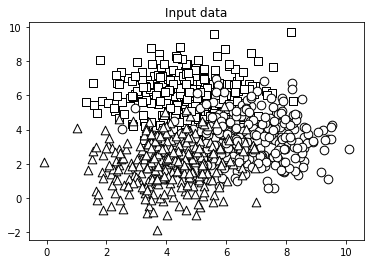

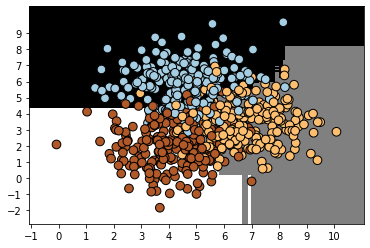


Test dataset



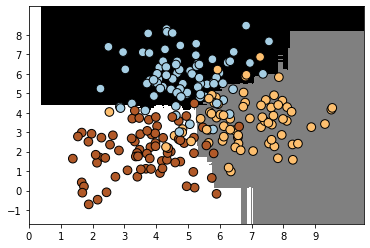


########################################

Classifier performance on training dataset

              precision    recall  f1-score   support

     Class-0       0.91      0.86      0.88       221
     Class-1       0.84      0.87      0.86       230
     Class-2       0.86      0.87      0.86       224

    accuracy                           0.87       675
   macro avg       0.87      0.87      0.87       675
weighted avg       0.87      0.87      0.87       675

########################################

########################################

Classifier performance on test dataset

              precision    recall  f1-score   support

     Class-0       0.92      0.85      0.88        79
     Class-1       0.86      0.84      0.85        70
     Class-2       0.84      0.92      0.88        76

    accuracy                           0.87       225
   macro avg       0.87      0.87      0.87       225
weighted avg       0.87      0.87      0.87       225

###########################

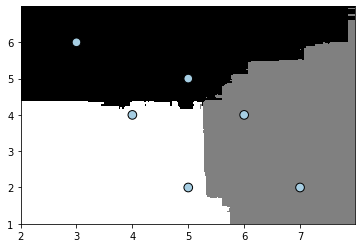

In [36]:
#Clasificación bosque aleatorio
random_forests('rf','data_random_forests.txt')


Training dataset



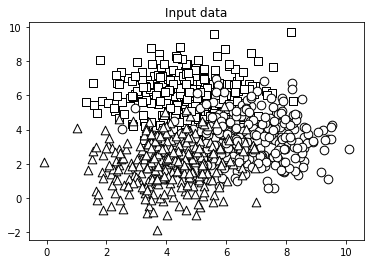

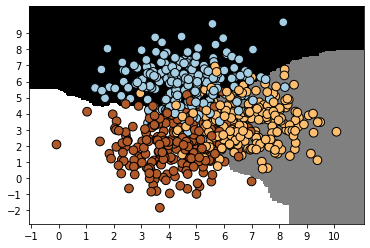


Test dataset



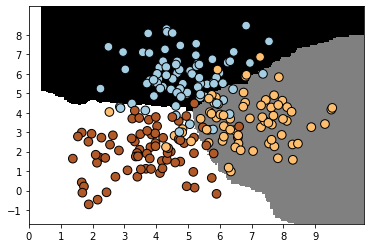


########################################

Classifier performance on training dataset

              precision    recall  f1-score   support

     Class-0       0.89      0.83      0.86       221
     Class-1       0.82      0.84      0.83       230
     Class-2       0.83      0.86      0.85       224

    accuracy                           0.85       675
   macro avg       0.85      0.85      0.85       675
weighted avg       0.85      0.85      0.85       675

########################################

########################################

Classifier performance on test dataset

              precision    recall  f1-score   support

     Class-0       0.92      0.85      0.88        79
     Class-1       0.84      0.84      0.84        70
     Class-2       0.85      0.92      0.89        76

    accuracy                           0.87       225
   macro avg       0.87      0.87      0.87       225
weighted avg       0.87      0.87      0.87       225

###########################

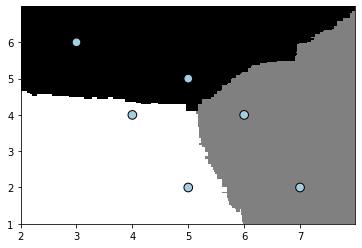

In [37]:
#Clasificación bosque extremadamente aleatorio
random_forests('erf','data_random_forests.txt')